#<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>Heart Disease Detection<span style="color: #000000">  🔮</span></b><br><span style="color: #FF5C8A; font-size: 24px"> </span></h1>
<hr>


# Library and System Configuration

# **Library Import** 📚

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

# **Dataset Configuration** ⏳

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!rm -rf heart/
!kaggle datasets download -d johnsmith88/heart-disease-dataset -p /content/dataset --unzip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 15.7MB/s]


In [ ]:
# --- Importing Dataset ---
data = pd.read_csv("/content/dataset/heart.csv")

# --- Reading Dataset ---
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data Understanding** 🌎


### Informasi Dataset

In [ ]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', data.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', data.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
data.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

Dataset diperoleh pada tautan
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Dataset ini terdiri dari **14 variabel/ Kolom** dan **1025 Baris**, yang terbagi menjadi:

- **9 variabel kategorikal**, dan
- **5 variabel kontinu**.


------------------------------------------------------
| **Kolom** | **Deskripsi** | **Sampel** |
|--------------------|---------------|------------------|
| **Age**           | Usia pasien (dalam tahun) | 63; 37; ... |
| **Sex**           | Jenis kelamin pasien (0 = laki-laki; 1 = perempuan) | 1; 0; ... |
| **cp**            | Jenis nyeri dada (4 nilai: 0, 1, 2, 3) | 3; 1; 2; ... |
| **trestbps**      | Tekanan darah saat istirahat (dalam mm Hg) | 145; 130; ... |
| **chol**          | Kolesterol serum (dalam mg/dl) | 233; 250; ... |
| **fbs**           | Gula darah puasa > 120 mg/dl (1 = benar; 0 = salah) | 1; 0; ... |
| **restecg**       | Hasil elektrokardiografi saat istirahat (nilai: 0, 1, 2) | 0; 1; ... |
| **thalach**       | Detak jantung maksimum yang dicapai | 150; 187; ... |
| **exang**         | Angina akibat olahraga (1 = ya; 0 = tidak) | 1; 0; ... |
| **oldpeak**       | Depresi ST akibat olahraga dibandingkan saat istirahat | 2.3; 3.5; ... |
| **slope**         | Kemiringan segmen ST pada puncak olahraga (nilai: 0, 1, 2) | 0; 2; ... |
| **ca**            | Jumlah pembuluh darah utama (0-4) yang terlihat melalui fluoroskopi | 0; 3; ... |
| **thal**          | (3 = normal; 6 = cacat tetap; 7 = cacat reversibel) | 3; 7; ... |
| **Target**        | Kolom target (1 = Ya; 0 = Tidak) | 1; 0; ... |


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Handing *Missing Value***

In [ ]:
# Checking the missing value of dataframe
print("The Missing Value : ")
data.isna().sum()

The Missing Value : 


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Dataset tidak memiliki nilai yang hilang / missing value, sehingga tidak perlu perlakuan khsuus dalam menangani hal tersebut

**Handing *Duplicated Data***

In [ ]:
print("Jumlah Data Duplikat")
data.duplicated().sum()

Jumlah Data Duplikat


723

In [ ]:
# Persentase Duplikasi Data
duplication_percentage = (data.duplicated().sum() / len(data)) * 100

print(f"Persentase Duplikasi Data : {duplication_percentage:.2f}%")

Persentase Duplikasi Data : 70.54%


Karena data memiliki rate duplicate data >70% maka data tetap dipertahankan untuk memperhatikan model performance. Selain itu dalam kasus pengumpulan data medis, duplikasi data bisa saja terjadi karena karakteristik tubuh pasien satu dengan yang lainnya memiliki kemungkinan besar sama / mirip

## Univariate Analysis

### Age


.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




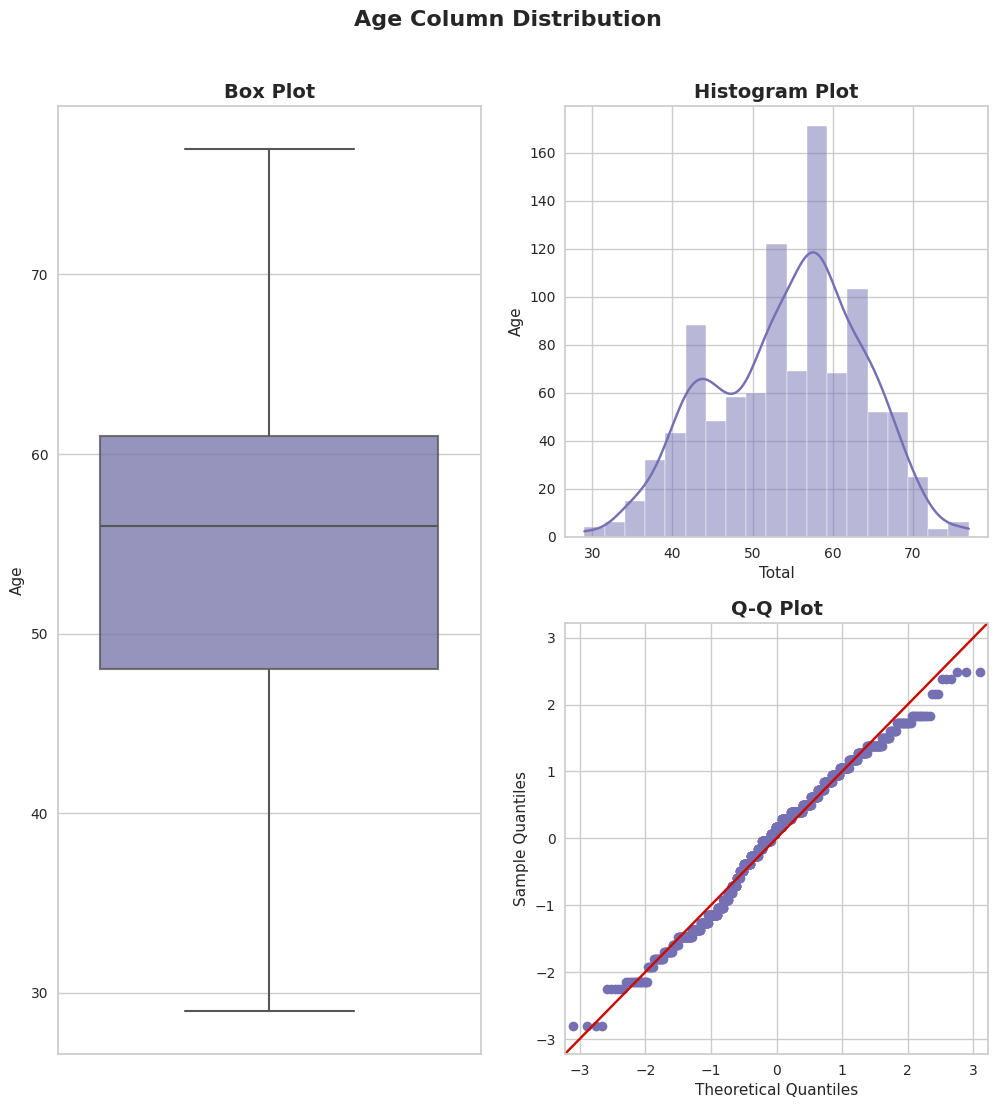

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'age'
fig = plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis=0, skipna=True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2, color='#BA1141')
plt.xlabel('Theoretical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()


<div style="font-family: Segoe UI; line-height: 2; color:#000000 text-align: justify">
    From the <b>histogram and boxplot</b>, it can be seen that this column is <mark><b>normally distributed</b></mark>. This also proven by <b>skewness value (-0.2)</b> of this column.<br>
    In this column, <b>the kurtosis value is -0.5</b>, which indicates that the column is <mark><b>platikurtic</b></mark>.<br>
    From the Q-Q plot, <b>the data values tend to closely follow the 45-degree</b>, which means the data is likely <mark><b>normally distributed</b></mark> (as stated previously).
    <blockquote style="font-size: 12px; color: #000000;"> If skewness is <b>less than -1 or greater than 1</b>, the distribution is <mark><b>highly skewed</b></mark>. If skewness is <b>between -1 and -0.5 or between 0.5 and 1</b>, the distribution is <mark><b>moderately skewed</b></mark>. If skewness is <b>between -0.5 and 0.5</b>, the distribution is <mark><b>approximately symmetric</b></mark>.
    </blockquote>
    <blockquote style="font-size: 12px; color: #000000;">If <mark><b>Kurtosis</b></mark> values are used to show <mark><b>tailedness of a column</b></mark>, the value of a normal distribution (mesokurtotic) should be equal to 3. If kurtosis value is more than 3, it is called leptokurtic. Meanwhile, if kurtosis value is less than 3, then it is called platikurtic.</blockquote>
</div>


### Sex


*************************
.: Sex (Gender) Total :.
*************************
sex
1    713
0    312
Name: count, dtype: int64


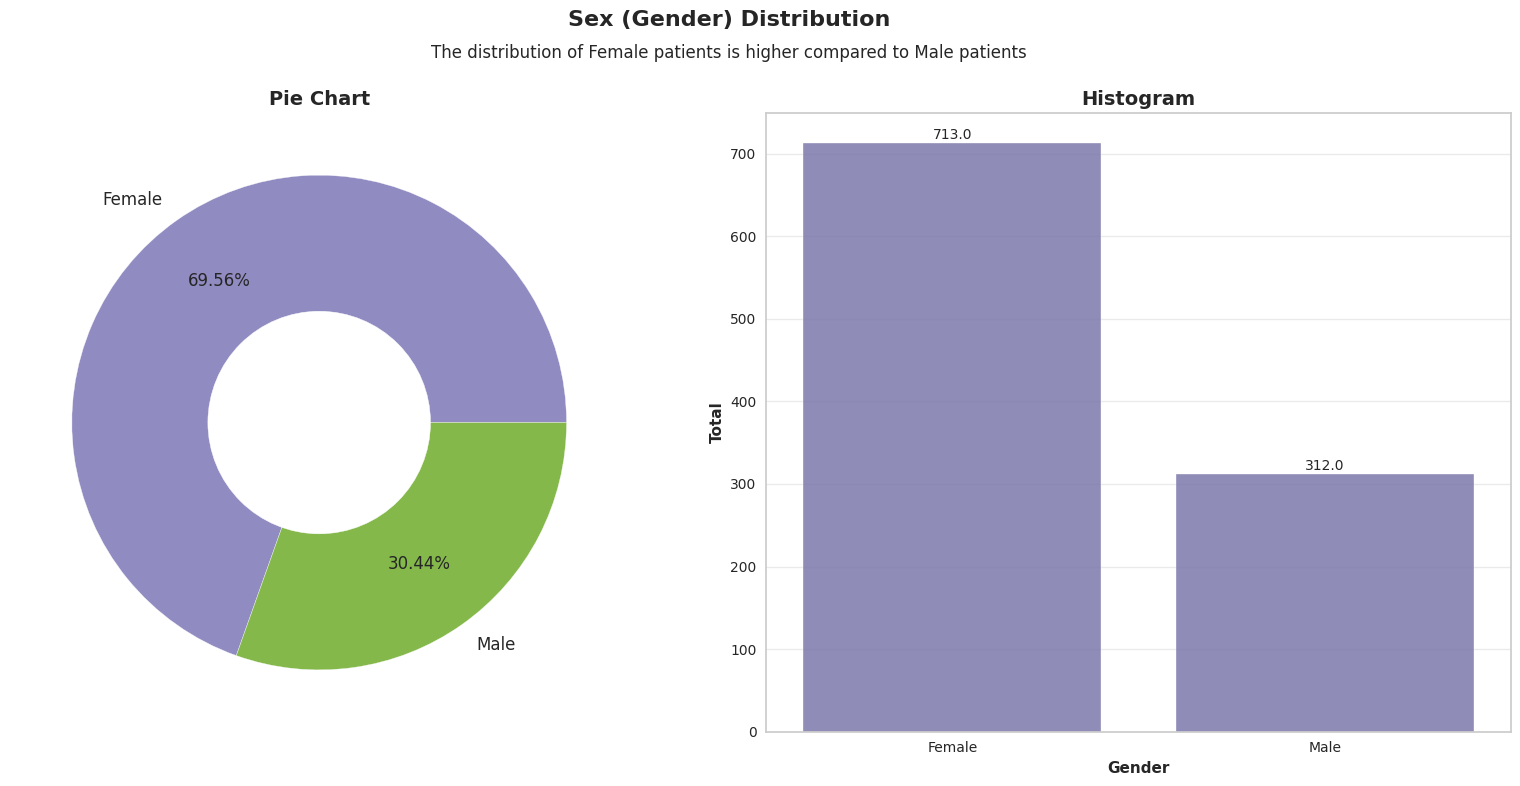

In [ ]:
# --- Setting Labels and Order ---
labels = ['Female', 'Male']
order = data['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif')
plt.figtext(0.5, 0.92, "The distribution of Female patients is higher compared to Male patients",
            ha="center", fontsize=12, fontweight='light', fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='sex', data=data, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25,
            rect.get_height(),
            horizontalalignment='center', fontsize=10)

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
print(data['sex'].value_counts(dropna=False))

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap with title
plt.show()


### Chest Pain (CP)

******************************
.: Chest Pain Type Total :.
******************************
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


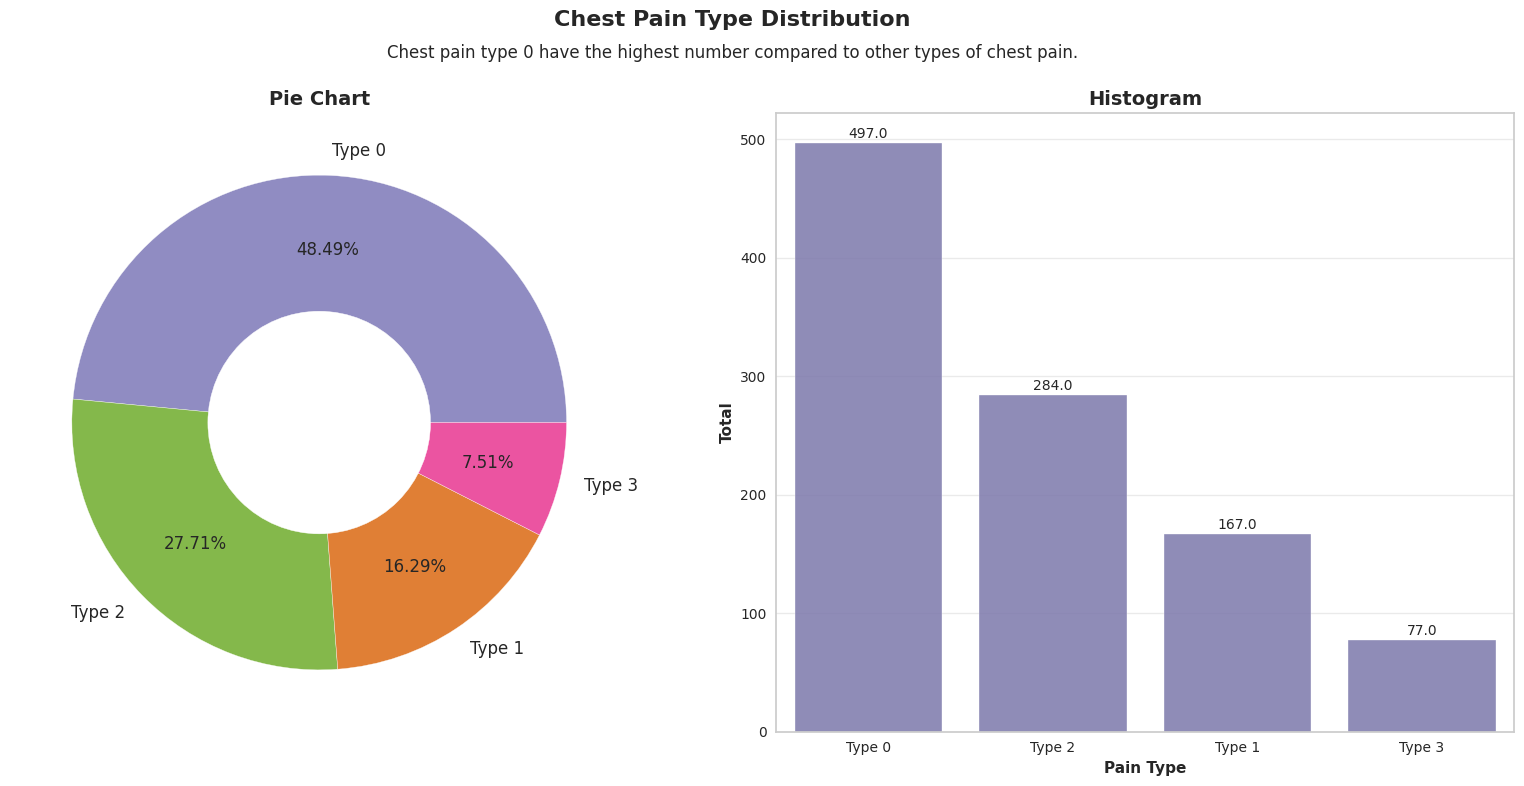

In [ ]:
# --- Setting Labels and Order ---
labels = ['Type 0', 'Type 2', 'Type 1', 'Type 3']
order = data['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif')
plt.figtext(0.5, 0.92, "Chest pain type 0 have the highest number compared to other types of chest pain.",
            ha="center", fontsize=12, fontweight='light', fontfamily='sans-serif')


# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['cp'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize': 12},
        wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='cp', data=data, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10)

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
print(data['cp'].value_counts(dropna=False))

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap with the title
plt.show()


### trestbps
Resting Blood Pressure (in mm Hg on admission to the hospital)

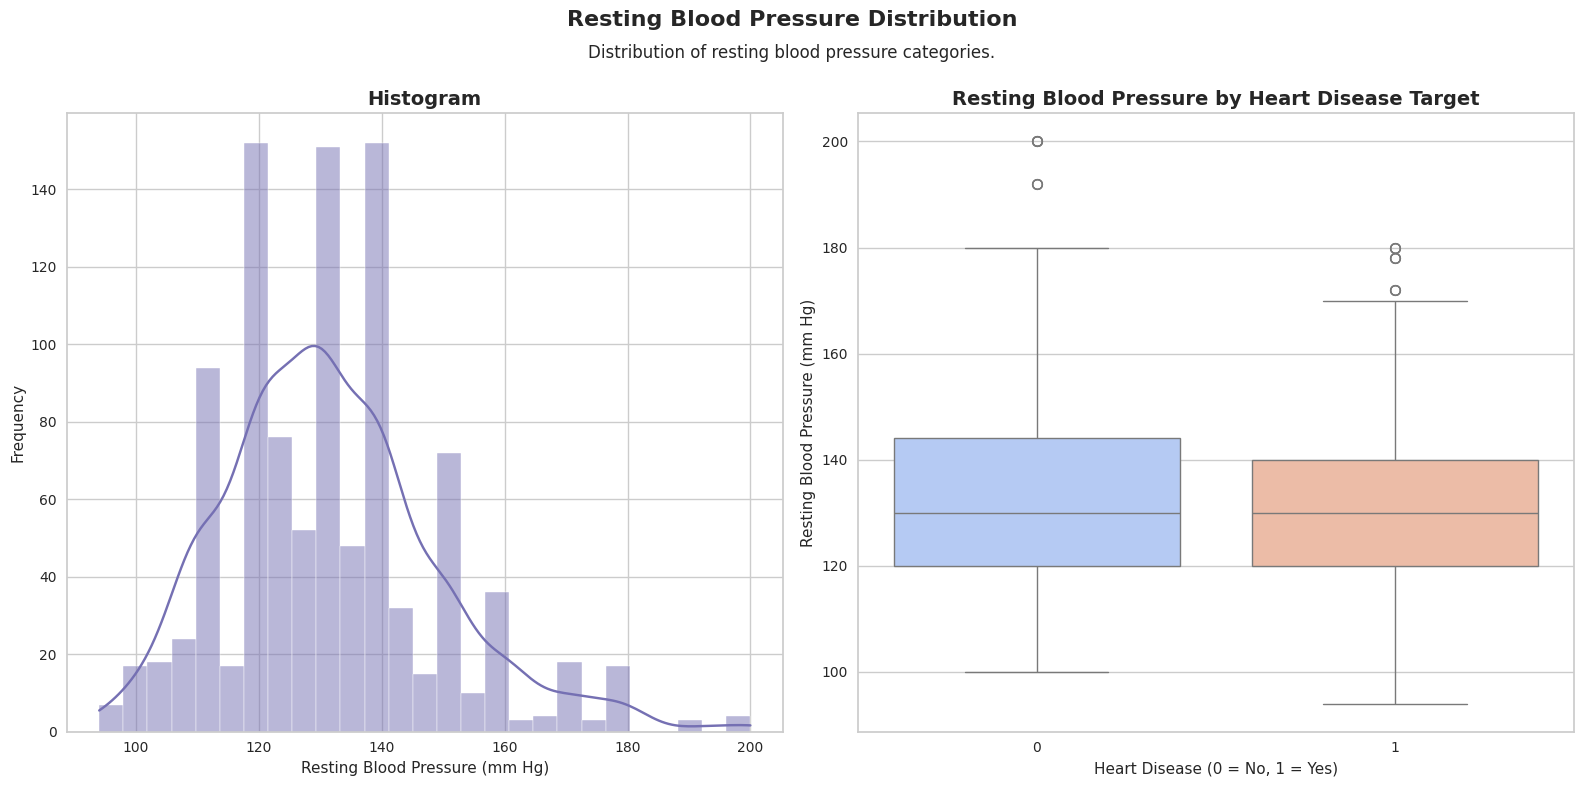

******************************
.: Resting Blood Pressure Total :.
******************************
trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: count, dtype: int64


In [ ]:
# --- Setting Labels and Order ---
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
order = data['trestbps'].value_counts().index

# --- Figure 1: Distribution Visualization ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Blood Pressure Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif')
plt.figtext(0.5, 0.92, "Distribution of resting blood pressure categories.",
            ha="center", fontsize=12, fontweight='light', fontfamily='sans-serif')

# --- Histogram (Numerical Distribution) ---
plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.histplot(data=data, x='trestbps', kde=True)  # Visualize the original numerical data
plt.xlabel('Resting Blood Pressure (mm Hg)', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Frequency', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Box Plot for Relationship with Target ---
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='trestbps', data=data, palette='coolwarm')
plt.title('Resting Blood Pressure by Heart Disease Target', fontweight='bold',
          fontsize=14, fontfamily='sans-serif')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Resting Blood Pressure (mm Hg)', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# --- Adjust Layout ---
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Avoid overlap with the suptitle
plt.show()

# --- Display Value Counts ---
print('*' * 30)
print('\033[1m' + '.: Resting Blood Pressure Total :.' + '\033[0m')
print('*' * 30)
print(data['trestbps'].value_counts(dropna=False))


### Cholestrol
Serum cholestoral in mg/dl

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




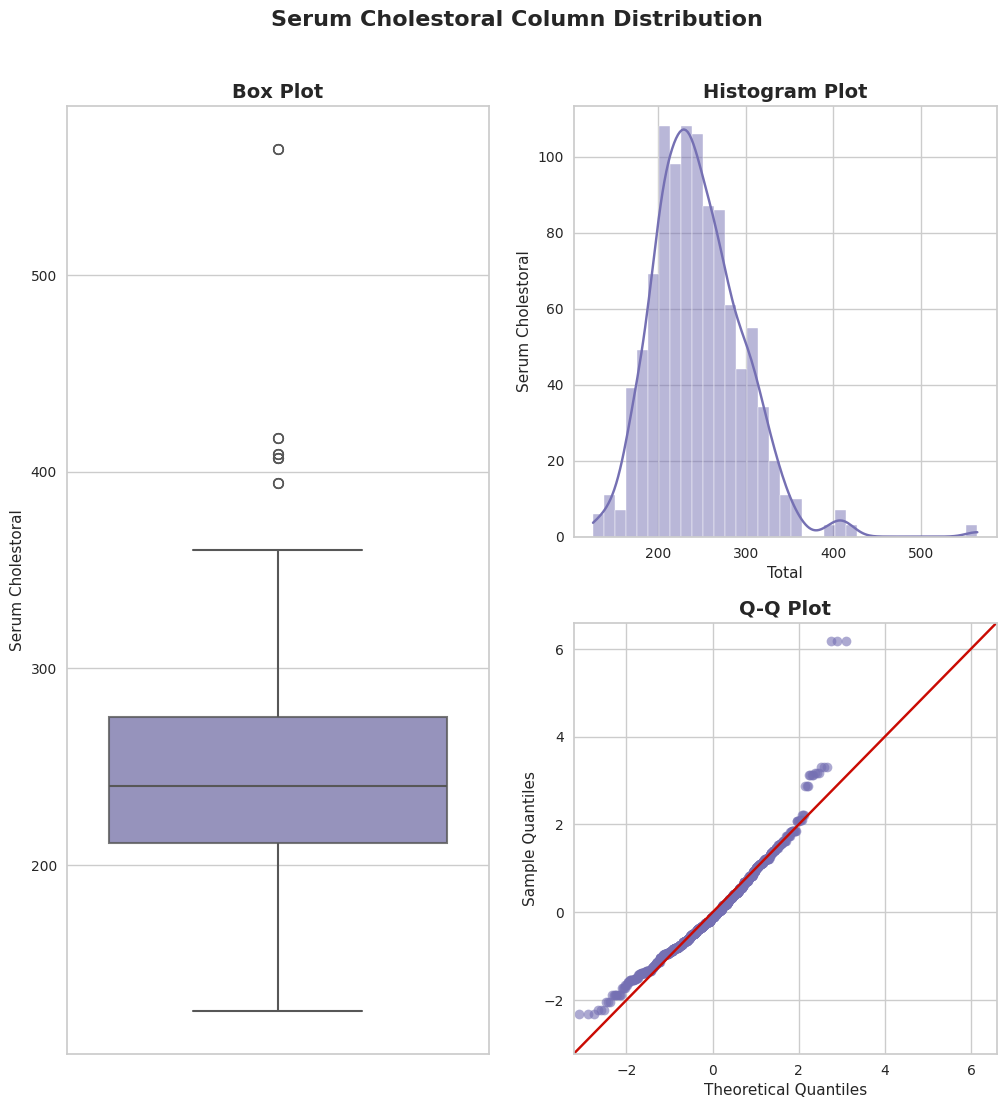

In [ ]:
# --- Variable & Plot Size ---
var = 'chol'
fig = plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis=0, skipna=True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoretical Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Box Plot ---
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

### fbs
(fasting blood sugar &gt; 120 mg/dl)
(1 = true; 0 = false)

********************************
.: Fasting Blood Sugar Total :.
********************************
fbs
0    872
1    153
Name: count, dtype: int64


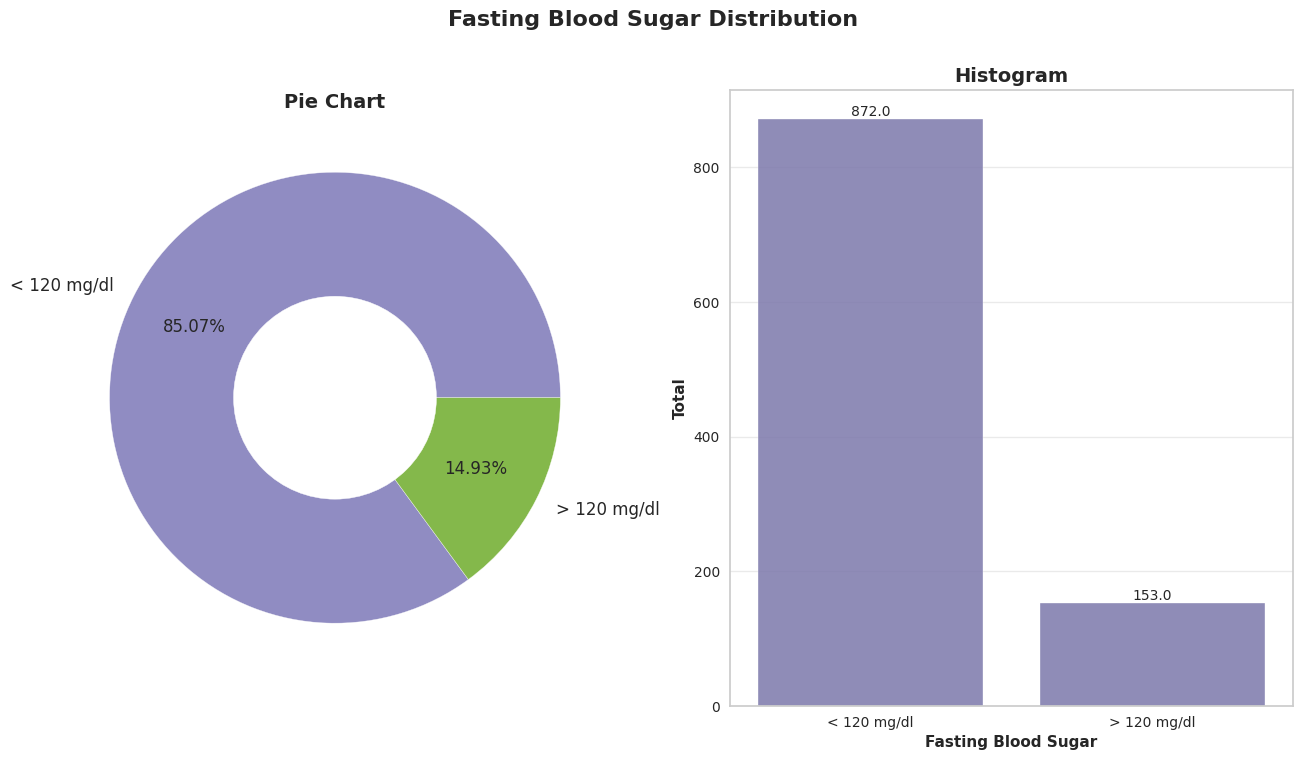

In [ ]:
# --- Setting Labels and Order ---
labels = ['< 120 mg/dl', '> 120 mg/dl']
order = data['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['fbs'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=data, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10)

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
print(data.fbs.value_counts(dropna=False))


### Restecg
Resting electrocardiographic results

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************
restecg
1    513
0    497
2     15
Name: count, dtype: int64


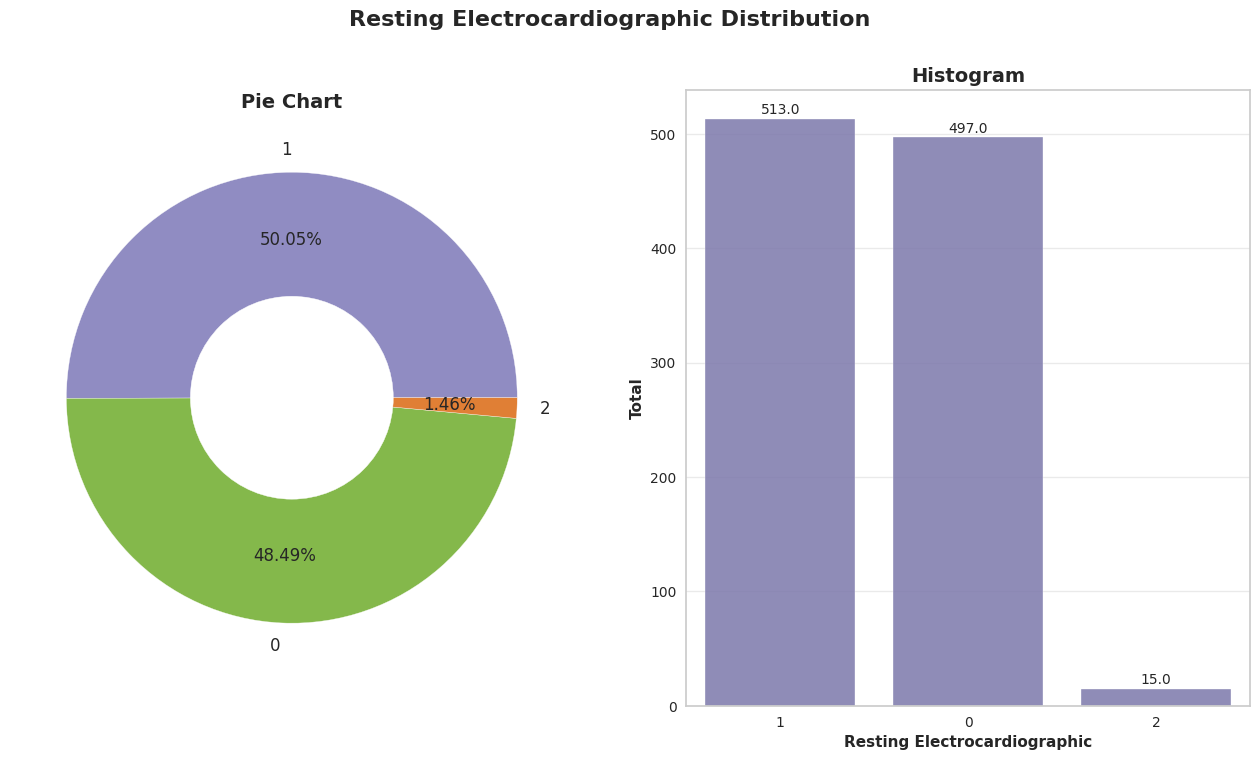

In [ ]:
# --- Setting Labels and Order ---
labels = ['1', '0', '2']
order = data['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['restecg'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=data, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10)

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
print(data.restecg.value_counts(dropna=False))

### Thalach
Maximum heart rate achieved

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089




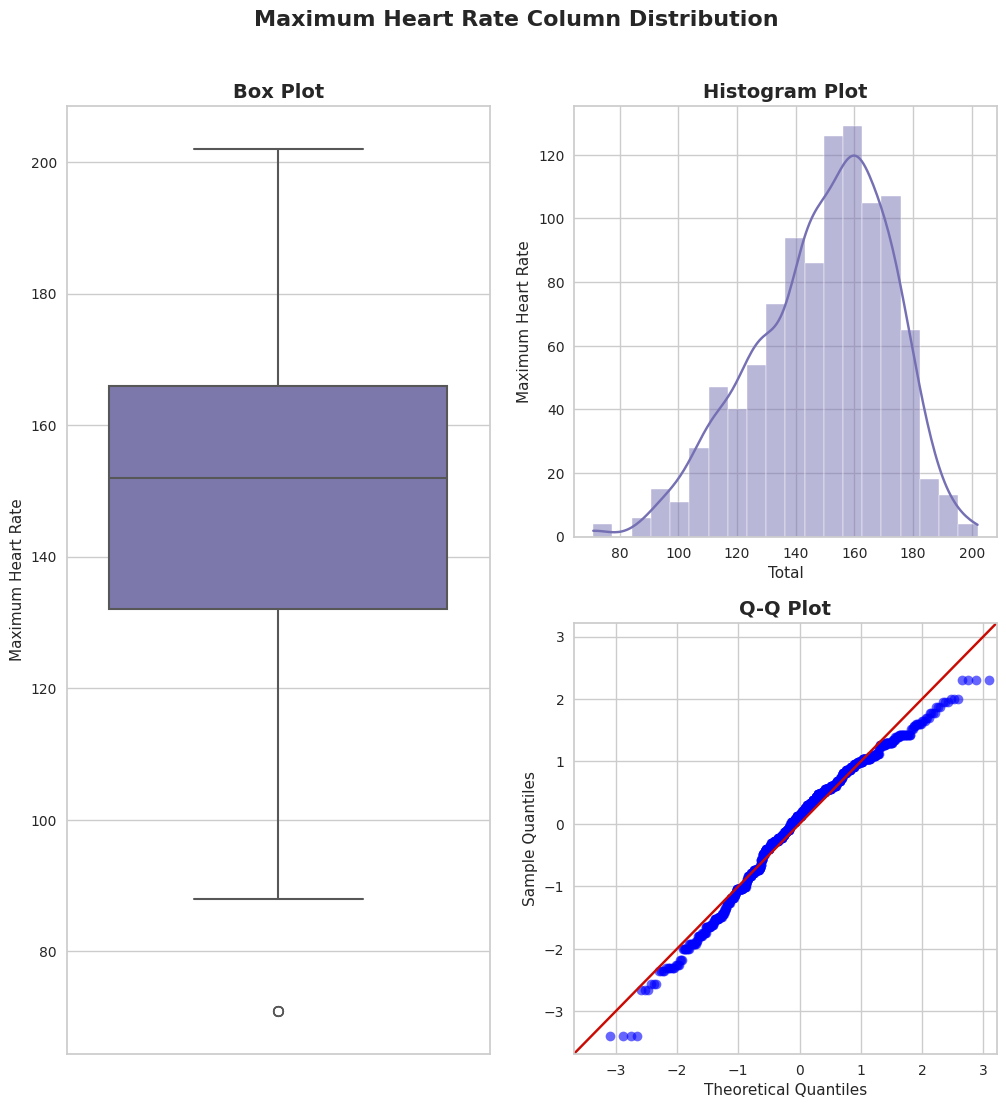

In [ ]:
# --- Variable & Plot Size ---
var = 'thalach'
fig = plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:' + '\033[1m {:.3f}'.format(data[var].skew(axis=0, skipna=True)))
print('\033[0m' + 'Kurtosis:' + '\033[1m {:.3f}'.format(data[var].kurt(axis=0, skipna=True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor='blue', markeredgecolor='blue', alpha=0.6)
plt.xlabel('Theoretical Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Box Plot ---
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var, linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()


### Exang
Exercise Induced Angina

***********************************
.: Exercise Induced Angina Total :.
***********************************
exang
0    680
1    345
Name: count, dtype: int64


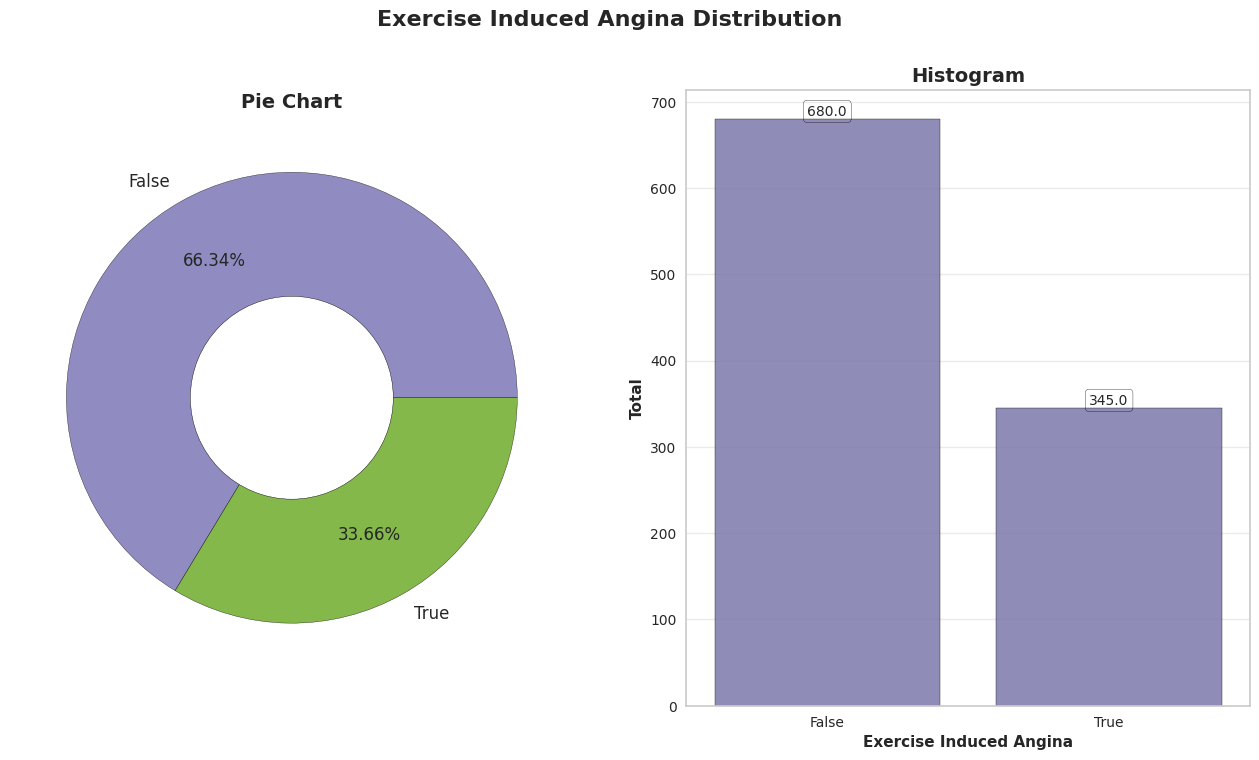

In [ ]:
# --- Labels & Order ---
labels = ['False', 'True']
order = data['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['exang'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8, edgecolor='black'), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='exang', data=data, order=order, edgecolor='black', alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='none', edgecolor='black', linewidth=0.25,
                      boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
print(data['exang'].value_counts(dropna=False))


### Oldpeak
ST depression induced by exercise relative to rest

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.211
Kurtosis: 1.314




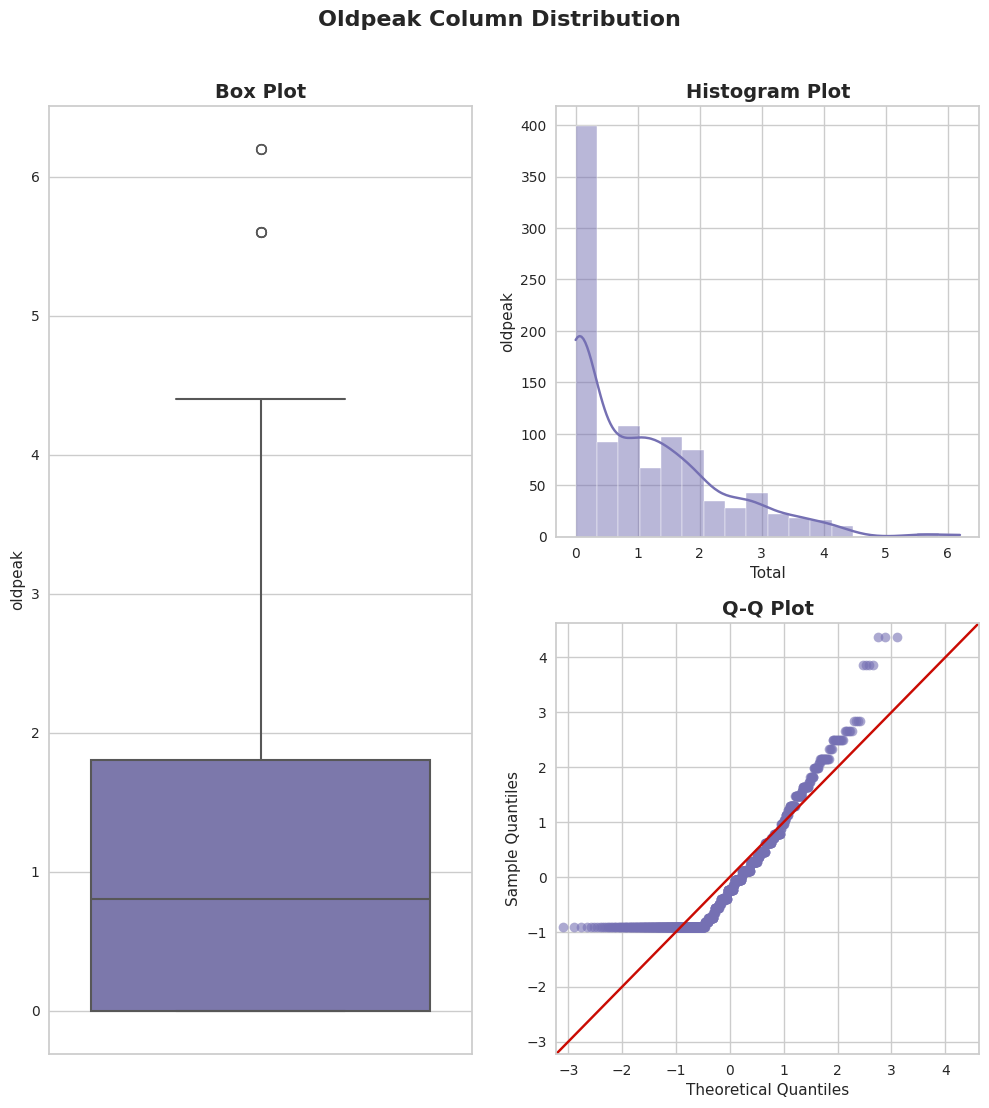

In [ ]:
# --- Variable & Plot Size ---
var = 'oldpeak'
fig = plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis=0, skipna=True)))
print('\n')

# --- General Title ---
fig.suptitle('Oldpeak Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoretical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var, linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

## Multivariate Analysis

### Heart Disease Scatter Based on Age

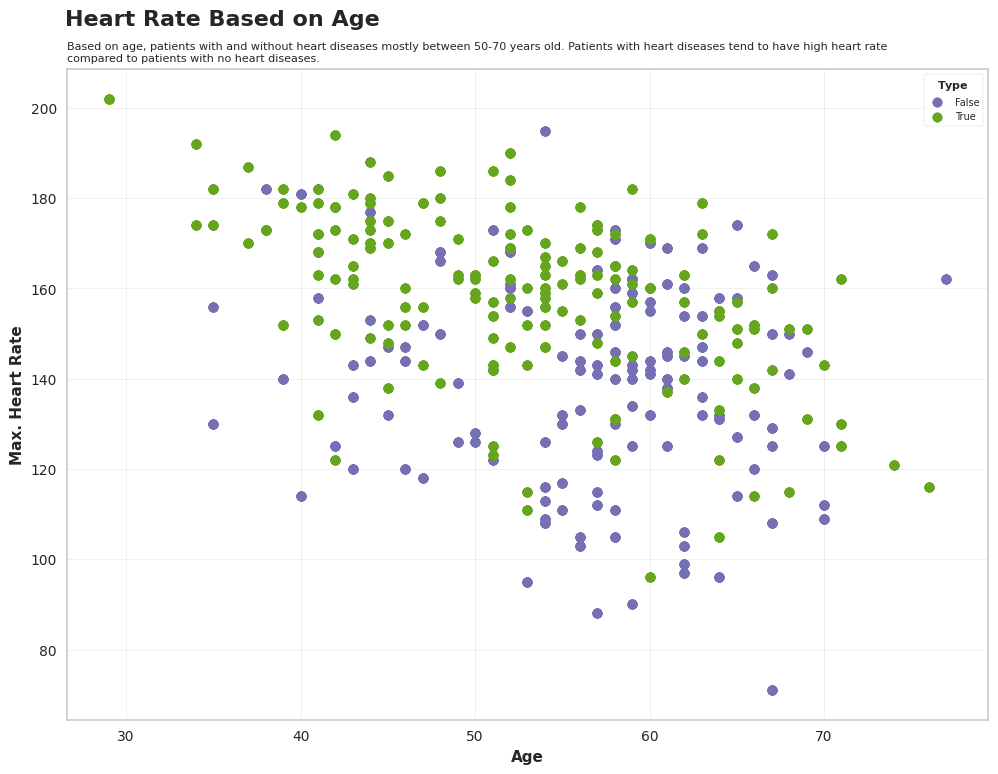

In [ ]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Rate Based on Age',
             fontweight='heavy',
             x=0.048,
             y=0.98,
             ha='left',
             fontsize='16',
             fontfamily='sans-serif',
             )
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.',
          fontsize='8',
          fontfamily='sans-serif',
          loc='left',
          )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'],
           title='$\\bf{Type}$',
           fontsize='7',
           title_fontsize='8',
           loc='upper right',
           frameon=True)

plt.xlabel('Age',
           fontweight='bold',
           fontsize='11',
           fontfamily='sans-serif',
           )

plt.ylabel('Max. Heart Rate',
           fontweight='bold',
           fontsize='11',
           fontfamily='sans-serif',
           )

plt.ticklabel_format(style='plain',
                     axis='both')

plt.grid(axis='both',
         alpha=0.4,
         lw=0.5)

plt.show();

### Heart Disease Distribution based on Fasting Blood Sugar

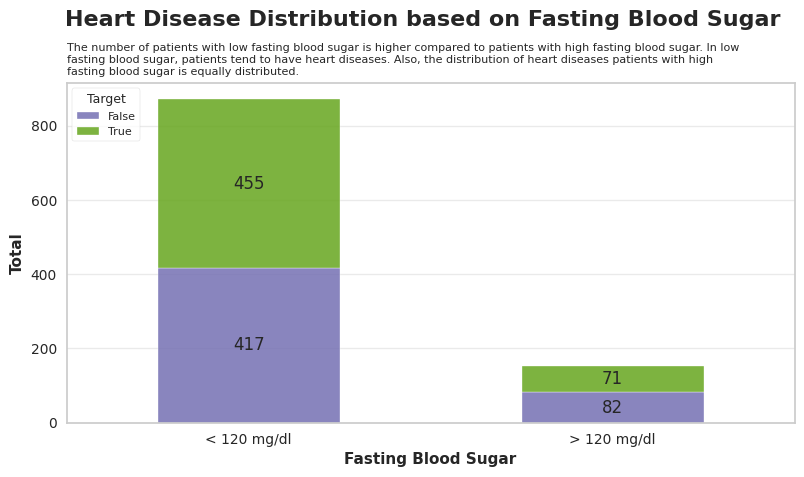

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(data.fbs,
                 data.target).plot(kind='bar', figsize=(8, 5),stacked=True, alpha=0.85)

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.0f}'.format(height),
            horizontalalignment='center', verticalalignment='center')

# --- Title and Annotations ---
plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar',
             fontweight='bold', x=0.065, y=0.98, ha='left', fontsize=16)
plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.',
          fontsize=8, loc='left')

# --- General Chart Settings ---
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontweight='bold')
plt.ylabel('Total', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='Target', fontsize=8, title_fontsize=9,
           loc='upper left', frameon=True)

plt.show()

### Heatmap Each Variables

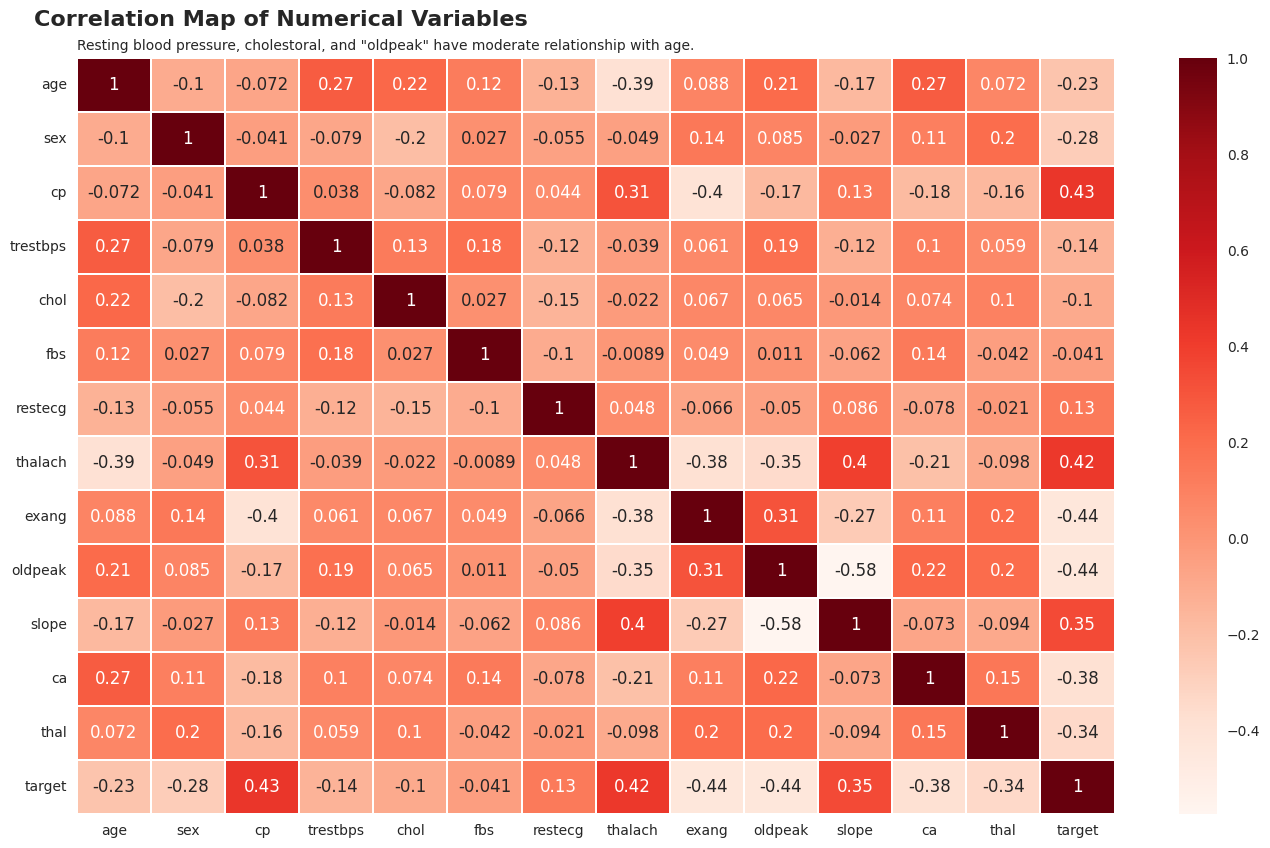

In [ ]:
plt.figure(figsize=(14, 9))

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(),
            annot=True,
            cmap='Reds',
            linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables',
             fontweight='heavy',
             x=0.03,
             y=0.98,
             ha='left',
             fontsize='16',
             fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.',
          fontsize='10',
          fontfamily='sans-serif',
          loc='left')

plt.tight_layout(rect=[0,
                       0.04,
                       1,
                       1.01])
plt.show()

#**Data Preparation** 🏰

## Feature Engineering

In [ ]:
# Sesuaikan Data Type
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()

print("Variabel Kategorik :", categorical_cols)

print("Variables Numerik :", numerical_cols)

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_processed = data.copy()

label_encoder = LabelEncoder()
df_processed[categorical_cols] = df_processed[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

Variabel Kategorik : []
Variables Numerik : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Proses Feature Engineering
---
1. **Identifikasi Variabel**  
   Data dibagi menjadi dua tipe utama berdasarkan jenisnya:
   - **Variabel Kategorik:** Kolom yang bertipe `object` (biasanya teks), yang disimpan dalam daftar `categorical_cols`.
   - **Variabel Numerik:** Kolom bertipe `int` atau `float`, yang disimpan dalam daftar `numerical_cols`.  
   Daftar kolom masing-masing tipe dicetak untuk memverifikasi identifikasi.

2. **Pendefinisian Kolom**  
   Secara manual, beberapa kolom spesifik yang dikenal sebagai variabel kategorik dan numerik didefinisikan dalam daftar `categorical_cols` dan `numerical_cols`.

3. **Transformasi Variabel Kategorik**  
   Salinan dataset asli dibuat menggunakan `data.copy()` untuk menghindari perubahan pada data awal. Variabel kategorik kemudian diubah menjadi format numerik menggunakan **`LabelEncoder`**, yang mengonversi setiap nilai kategorik menjadi angka.

## Splitting Dataset

In [ ]:
X = df_processed.drop('target', axis=1)
y = df_processed['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(820, 13)
(205, 13)


**Proses Splitting Data Sebagai Berikut**

**Pemisahan Fitur dan Target**  
   Dataset dibagi menjadi:
   - **`X` (Fitur):** Semua kolom kecuali kolom target (`target`).
   - **`y` (Target):** Kolom `target` yang berisi nilai yang ingin diprediksi.

**Pembagian Data**  
   Dataset dibagi menjadi data pelatihan dan data pengujian menggunakan **`train_test_split`** dari scikit-learn, dengan rasio 80:20
   - **Data Pelatihan:** `X_train` dan `y_train`.
   - **Data Pengujian:** `X_test` dan `y_test`.  
   Parameter `random_state=42` memastikan hasil pembagian data konsisten setiap kali kode dijalankan.




# Model Development 🤖


## Traditional Machine Learning ⚡

### Stacking Classifier Base Models dan Meta-Model

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=2)),  # p=2 for Euclidean distance
    ('log', LogisticRegression(max_iter=2000, C=0.5, solver='lbfgs', random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(max_iter=2000, C=0.5, solver='lbfgs')

# Create stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked_model.fit(X_train_scaled, y_train)

# Predict and evaluate the stacked model
y_pred_stacked = stacked_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_stacked)
report = classification_report(y_test, y_pred_stacked)

# Output results
print(f"Stacked Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Cross-validation scores for base models
for name, model in base_models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"\n{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean CV Accuracy: {cv_scores.mean():.4f}")

# Cross-validation scores for stacked model
stacked_cv_scores = cross_val_score(stacked_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nStacked Model Cross-Validation Mean Accuracy: {stacked_cv_scores.mean():.4f}")

Stacked Model Accuracy: 0.9854

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


rf Cross-Validation Scores: [0.98780488 0.94512195 0.98780488 0.9695122  0.92073171]
rf Mean CV Accuracy: 0.9622

svc Cross-Validation Scores: [0.94512195 0.90853659 0.90853659 0.94512195 0.8902439 ]
svc Mean CV Accuracy: 0.9195

knn Cross-Validation Scores: [0.8902439  0.84756098 0.86585366 0.84146341 0.76829268]
knn Mean CV Accuracy: 0.8427

log Cross-Validation Scores: [0.83536585 0.85365854 0.8902439  0.86585366 0.79268293]
log Mean CV Accuracy: 0.8476

et Cross-Validation Scores: [1.         0.93902439 0.95731707 0.96341463 0.93292683]
et Mean CV Accuracy: 0.9585

dt Cross-Validation Scores: [0.90853659 

**Cara kerja dan parameter dari setiap algoritma yang digunakan**
---

**1. StandardScaler**
- Fungsi:

  Mengubah data sehingga memiliki distribusi dengan rata-rata 0 dan standar deviasi 1. Hal ini penting untuk algoritma yang sensitif terhadap skala fitur, seperti SVM dan KNN.
- Parameter:

  Tidak memiliki parameter yang dapat diubah dalam langkah ini.

---

**2. RandomForestClassifier**
- Cara Kerja:

  Model berbasis *ensemble* yang membangun beberapa *decision tree* pada subset data, kemudian menggabungkan hasilnya melalui rata-rata (untuk regresi) atau voting mayoritas (untuk klasifikasi).

- Parameter:
  - `n_estimators=200`: Jumlah pohon dalam hutan.
  - `max_depth=10`: Kedalaman maksimum setiap pohon.
  - `min_samples_split=5`: Minimum jumlah sampel untuk memisah simpul.
  - `min_samples_leaf=2`: Minimum sampel di setiap daun pohon.
  - `random_state=42`: Seed untuk hasil yang konsisten.

---

**3. SVC (Support Vector Classifier)**
- Cara Kerja:

  Mencari hyperplane yang memisahkan data dengan margin maksimum. Kernel RBF digunakan untuk menangani data non-linear.
- Parameter:
  - `probability=True`: Mengaktifkan prediksi probabilitas.
  - `kernel='rbf'`: Menggunakan kernel Radial Basis Function (RBF).
  - `C=1.0`: Parameter regulasi; mengontrol keseimbangan antara margin maksimum dan kesalahan klasifikasi.
  - `gamma='scale'`: Otomatis mengatur gamma berdasarkan data input.
  - `random_state=42`: Seed untuk hasil konsisten.

---

**4. KNeighborsClassifier**
- Cara Kerja:
  Algoritma *instance-based learning* yang mengklasifikasikan berdasarkan mayoritas label dari tetangga terdekat.
- Parameter:
  - `n_neighbors=5`: Jumlah tetangga terdekat yang dipertimbangkan.
  - `algorithm='auto'`: Memilih algoritma terbaik untuk mencari tetangga.
  - `p=2`: Menggunakan jarak Euclidean sebagai metrik.

---

**5. LogisticRegression**
- Cara Kerja:
  Model probabilistik yang menggunakan fungsi sigmoid untuk memetakan data ke dalam probabilitas kelas.
- **Parameter:**
  - `max_iter=2000`: Batas maksimum iterasi untuk konvergensi.
  - `C=0.5`: Parameter regulasi, mengontrol kekuatan penalti terhadap model yang kompleks.
  - `solver='lbfgs'`: Algoritma optimisasi untuk estimasi parameter.
  - `random_state=42`: Seed untuk hasil konsisten.

---

**6. ExtraTreesClassifier**
- Cara Kerja:

  Model berbasis ensemble yang serupa dengan Random Forest tetapi menggunakan pembagian acak dalam pohon untuk mengurangi overfitting.
- Parameter:
  - `n_estimators=200`: Jumlah pohon dalam ensemble.
  - `max_depth=10`: Kedalaman maksimum pohon.
  - `min_samples_split=5`: Minimum sampel untuk memisahkan simpul.
  - `min_samples_leaf=2`: Minimum sampel di setiap daun pohon.
  - `random_state=42`: Seed untuk hasil konsisten.

---

**7. DecisionTreeClassifier**
- Cara Kerja:

  Algoritma pohon keputusan yang memisahkan data berdasarkan aturan if-else pada setiap simpul.
- **Parameter:**
  - `max_depth=10`: Kedalaman maksimum pohon.
  - `min_samples_split=10`: Minimum sampel untuk memisahkan simpul.
  - `min_samples_leaf=2`: Minimum sampel di setiap daun pohon.
  - `random_state=42`: Seed untuk hasil konsisten.

---

**8. StackingClassifier**
- Cara Kerja:

  Kombinasi beberapa model dasar (*base models*) menggunakan meta-model Logistic Regression untuk membuat prediksi yang lebih baik.
- Parameter:
  - `estimators=base_models`: Daftar model dasar.
  - `final_estimator=meta_model`: Model meta untuk menggabungkan hasil dari model dasar.
  - `cv=5`: Menggunakan 5-fold cross-validation untuk melatih meta-model.

---

**Evaluasi Model**
- **Akurasi Model Stacking:**  
  Model Stacking diuji pada data pengujian dan menghasilkan metrik evaluasi seperti *accuracy* dan *classification report*.
- **Cross-Validation:**  
  Dilakukan untuk setiap model dasar dan model stacking untuk mengukur kinerja rata-rata (*mean accuracy*) pada data pelatihan.



## Deep Learning 🔥

### Scenario 1

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.5633 - loss: 76.8269 - val_accuracy: 0.4976 - val_loss: 22.9667
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5292 - loss: 17.9063 - val_accuracy: 0.5024 - val_loss: 8.7628
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5518 - loss: 7.4857 - val_accuracy: 0.5610 - val_loss: 4.5962
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5915 - loss: 4.0278 - val_accuracy: 0.6195 - val_loss: 2.7364
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5793 - loss: 2.5019 - val_accuracy: 0.6098 - val_loss: 1.8248
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6360 - loss: 1.6507 - val_accuracy: 0.5756 - val_loss: 1.3421
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5959 - loss: 1.2832 - val_accuracy: 0.6098 - val_loss: 1.1356
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5897 - loss: 1.0638 - val_accuracy: 0.6146

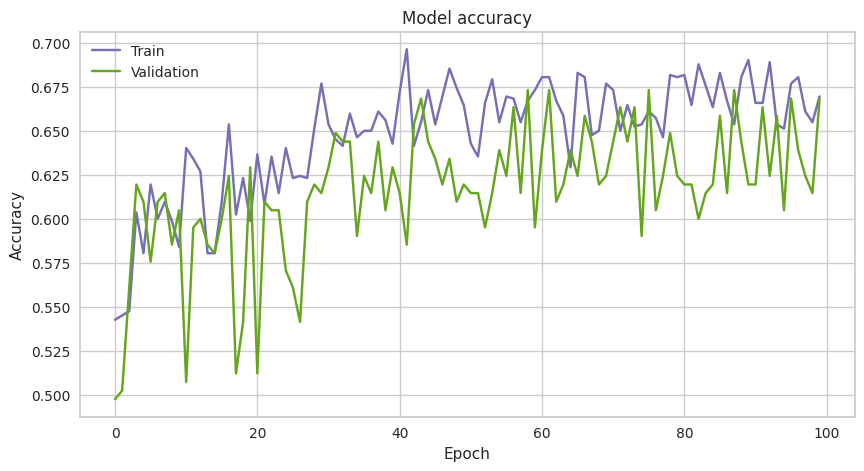

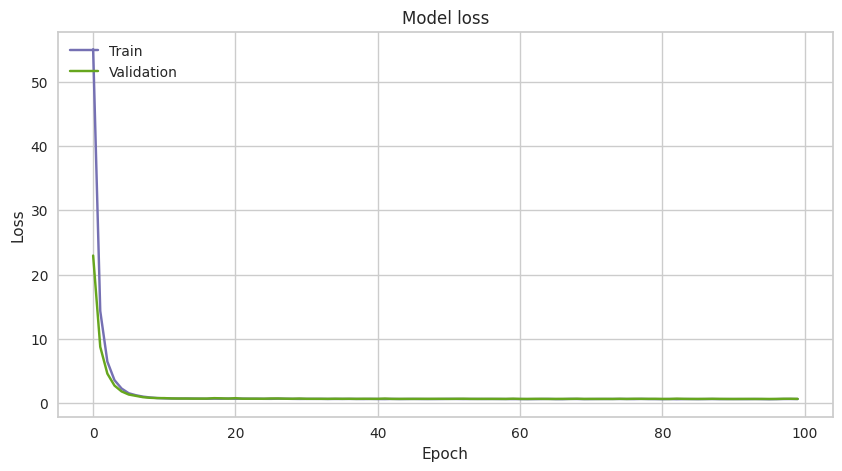

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.5)),  # Input layer with L2 regularization
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.4)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=16,
                    verbose=1, )

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Cara kerja dan parameter dari setiap algoritma yang digunakan

---
**1. Arsitektur Model**
Model menggunakan **Sequential API** dengan layer berikut:
- **Input Layer:**  
  - `Dense(1024)`: Layer pertama dengan 1024 unit neuron dan fungsi aktivasi `relu`.  
  - `kernel_regularizer=regularizers.l2(0.5)`: Menambahkan regularisasi L2 untuk mencegah overfitting. Regulasi L2 memberikan penalti pada bobot besar.
  - `input_shape=(X_train.shape[1],)`: Menentukan jumlah fitur pada data input.
  - `Dropout(0.3)`: Mencegah overfitting dengan mengabaikan 30% neuron selama pelatihan.

- **Hidden Layers:**  
  - `Dense(128)`: Layer dengan 128 neuron dan fungsi aktivasi `relu`.  
  - `kernel_regularizer=regularizers.l2(0.4)`: Regularisasi L2 diterapkan pada layer ini.  
  - `Dropout(0.2)`: Mengabaikan 20% neuron selama pelatihan.
  - `Dense(32)`: Layer tambahan dengan 32 neuron dan fungsi aktivasi `relu`.

- **Output Layer:**  
  - `Dense(1)`: Layer output dengan 1 neuron dan fungsi aktivasi `sigmoid` untuk menghasilkan probabilitas kelas.

---

**2. Kompilasi Model**
Model dikompilasi menggunakan:
- **Optimizer:** `adam`  
  - Algoritma optimasi adaptif yang efisien untuk data besar.
- **Loss Function:** `binary_crossentropy`  
  - Digunakan karena ini adalah masalah klasifikasi biner.
- **Metrics:** `accuracy`  
  - Untuk melacak akurasi selama pelatihan.

---

**3. Pelatihan Model**
Model dilatih menggunakan:
- **`X_train` dan `y_train`** sebagai data pelatihan.  
- **`validation_data=(X_test, y_test)`** untuk melacak kinerja model pada data validasi.
- **Epochs:** 100 iterasi penuh melalui data pelatihan.
- **Batch Size:** 16 sampel per batch.  
- **Verbose:** 1 untuk mencetak log selama pelatihan.

---




Hasil :

| Metrik                 | Pelatihan    | Validasi    |
|------------------------|--------------|-------------|
| **Akurasi**            | 0.6671 (66.71%) | 0.6683 (66.83%) |
| **Loss**               | 0.6485       | 0.6654      |

- Akurasi pelatihan dan validasi hampir sama, yang menunjukkan bahwa model dapat mengeneralisasi dengan baik pada data validasi dan tidak mengalami overfitting yang signifikan.  
- Loss validasi sedikit lebih tinggi dari loss pelatihan, tetapi perbedaan ini kecil dan tidak menunjukkan masalah yang besar.

Metrik Pengujian

| Metrik               | Pengujian   |
|----------------------|-------------|
| **Akurasi**          | 0.6792 (67.92%) |
| **Loss**             | 0.6603      |

- Akurasi pengujian sedikit lebih tinggi daripada akurasi pelatihan dan validasi, yang menunjukkan bahwa model sedikit lebih baik dalam menangani data yang belum terlihat.


| Aspek                       | Penjelasan                                                                                                                                 |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| **Tingkat Performa**        | Akurasi ~67% menunjukkan model cukup berhasil dalam klasifikasi, tetapi masih bisa dioptimalkan.                                          |
| **Pelatihan vs Validasi**   | Akurasi pelatihan dan validasi yang sangat mirip menunjukkan model tidak overfit atau underfit secara signifikan.                          |
| **Loss**                     | Nilai loss wajar, tetapi model belum sepenuhnya konvergen.             |

### Scenario 2

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.4768 - loss: 35.1368 - val_accuracy: 0.4976 - val_loss: 14.2323
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4873 - loss: 13.1239 - val_accuracy: 0.5024 - val_loss: 9.4002
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5234 - loss: 8.8377 - val_accuracy: 0.5024 - val_loss: 7.1111
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5258 - loss: 6.7188 - val_accuracy: 0.4976 - val_loss: 5.4511
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5058 - loss: 5.1528 - val_accuracy: 0.5073 - val_loss: 4.2194
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 4.0079 - val_accuracy: 0.5024 - val_loss: 3.3168
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5172 - loss: 3.1395 - val_accuracy: 0.4976 - val_loss: 2.6421
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5079 - loss: 2.5139 - val_accuracy: 0.5024

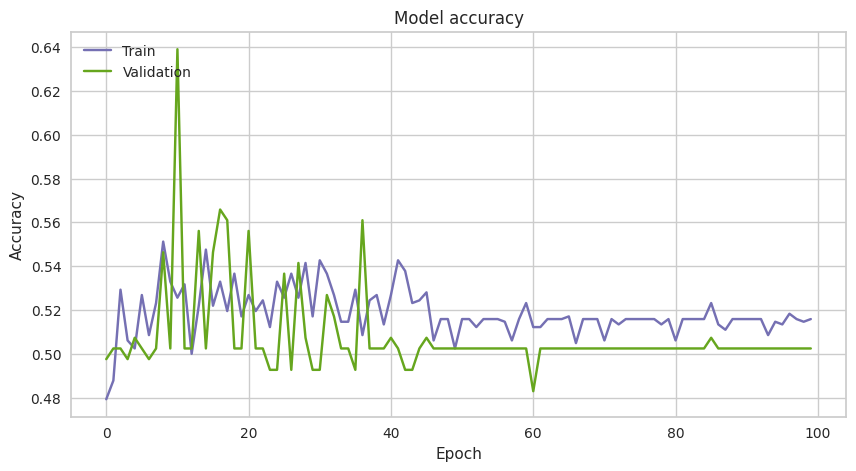

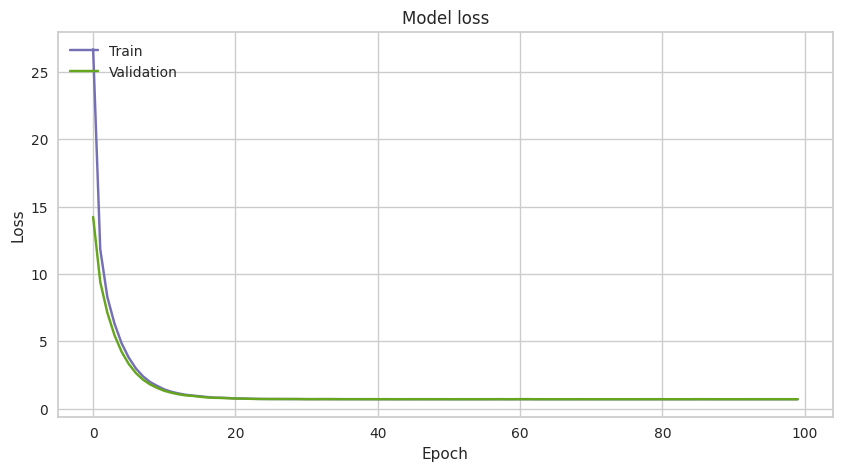

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.5)),  # Input layer with L2 regularization
    layers.Dropout(0.8),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.4)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=16,
                    verbose=1, )

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Penjelasan Cara Kerja dan Parameter algoritma pada Skenario 2

---

1.**Dense Layer (Fully Connected Layer)**  
Cara Kerja:  
- Layer ini menghubungkan semua neuron di layer sebelumnya dengan semua neuron di layer ini.
- Setiap koneksi memiliki bobot yang diperbarui selama pelatihan untuk meminimalkan error.

Parameter Utama:
- `units`: Jumlah neuron dalam layer.
- `activation`: Fungsi aktivasi untuk memperkenalkan non-linearitas, seperti `relu`, `sigmoid`, atau `softmax`.
- `input_shape`: Dimensi input untuk layer pertama.
- `kernel_regularizer`: Penambahan regulasi L1/L2 untuk mengurangi overfitting.

---

2.**Dropout Layer**  
Cara Kerja:  
- Secara acak "mematikan" (drop) beberapa neuron selama pelatihan untuk mencegah overfitting dengan membuat model lebih general.

Parameter Utama:
- `rate`: Proporsi neuron yang di-drop (contoh: `0.8` berarti 80% neuron dimatikan).

---

3. **Adam Optimizer**  
Cara Kerja:  
- Optimizer berbasis gradient descent yang menggabungkan dua metode:
  - **Momentum**: Mempercepat konvergensi.
  - **Adaptive Learning Rate (AdaGrad)**: Menyesuaikan learning rate secara dinamis.
- Adam sangat populer karena robust terhadap parameter learning rate dan bekerja baik pada data noisy.

Parameter Utama:
- `learning_rate`: Kecepatan pembelajaran.
- `beta_1`: Parameter momentum pertama (default `0.9`).
- `beta_2`: Parameter momentum kedua untuk penyesuaian learning rate (default `0.999`).

---

4. **L2 Regularization (Kernel Regularizer)**  
Cara Kerja:  
- Menambahkan penalti terhadap bobot besar dalam model ke fungsi loss untuk mengurangi kompleksitas model dan mencegah overfitting.

Parameter Utama:
- `l2`: Parameter regulasi; semakin besar nilainya, semakin besar penalti.

---

5. **Binary Crossentropy Loss**  
Cara Kerja:  
- Digunakan untuk masalah klasifikasi biner. Mengukur perbedaan antara probabilitas prediksi (`sigmoid output`) dan label sebenarnya.
Rumus:
$$
\text{Loss} = - \frac{1}{N} \sum_{i=1}^N \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Di mana:
- \(yi\): Label sebenarnya.
- \(Pi\): Prediksi model.
---

6. **Sigmoid Activation**  
Cara Kerja:  
- Mengubah output menjadi probabilitas dalam rentang \(0\) hingga \(1\).

Rumus:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

Metrik Pelatihan dan Validasi

| Metrik                 | Pelatihan    | Validasi    |
|------------------------|--------------|-------------|
| **Akurasi**            | 0.4993 (49.93%) | 0.5024 (50.24%) |
| **Loss**               | 0.6941       | 0.6944      |

- Akurasi pelatihan dan validasi sangat rendah, hanya sekitar 50%. Ini menunjukkan bahwa model hampir tidak lebih baik daripada prediksi acak.
- Loss pelatihan dan validasi yang hampir sama juga mengindikasikan bahwa model belum berhasil mempelajari pola yang signifikan dalam data.

| Metrik               | Pengujian   |
|----------------------|-------------|
| **Akurasi**          | 0.5024 (50.24%) |
| **Loss**             | 0.6953      |

- Akurasi pengujian mirip dengan akurasi validasi, menunjukkan bahwa model tidak dapat menangani data uji dengan baik.
- Loss pengujian sedikit lebih tinggi daripada loss pelatihan, yang menunjukkan bahwa model tidak cukup terlatih untuk melakukan prediksi yang akurat pada data baru.

| Aspek                       | Penjelasan                                                                                                                                 |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| **Tingkat Performa**        | Akurasi yang sangat rendah (~50%) menunjukkan bahwa model tidak berhasil dalam klasifikasi dan hampir tidak lebih baik dari tebak acak.  |
| **Pelatihan vs Validasi**   | Akurasi pelatihan dan validasi yang sangat mirip menunjukkan bahwa model belum belajar cukup banyak dari data dan mungkin underfitting.    |
| **Loss**                     | Nilai loss yang tinggi menunjukkan bahwa model tidak mampu mempelajari pola yang tepat, dan perlu perbaikan dalam arsitektur atau hyperparameter. |


### Scenario 3

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.5476 - loss: 0.7163 - val_accuracy: 0.7659 - val_loss: 0.6828
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7531 - loss: 0.6725 - val_accuracy: 0.7756 - val_loss: 0.6209
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7960 - loss: 0.5968 - val_accuracy: 0.7951 - val_loss: 0.5284
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8182 - loss: 0.4994 - val_accuracy: 0.7854 - val_loss: 0.4648
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8475 - loss: 0.4183 - val_accuracy: 0.7951 - val_loss: 0.4611
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8373 - loss: 0.4120 - val_accuracy: 0.8049 - val_loss: 0.4561
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8762 - loss: 0.3495 - val_accuracy: 0.8146 - val_loss: 0.4567
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8717 - loss: 0.3311 - val_accuracy: 0.8146 - val_los

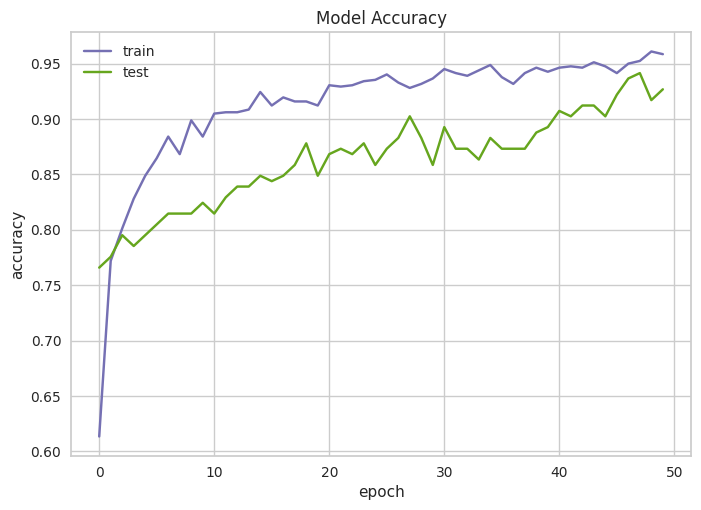

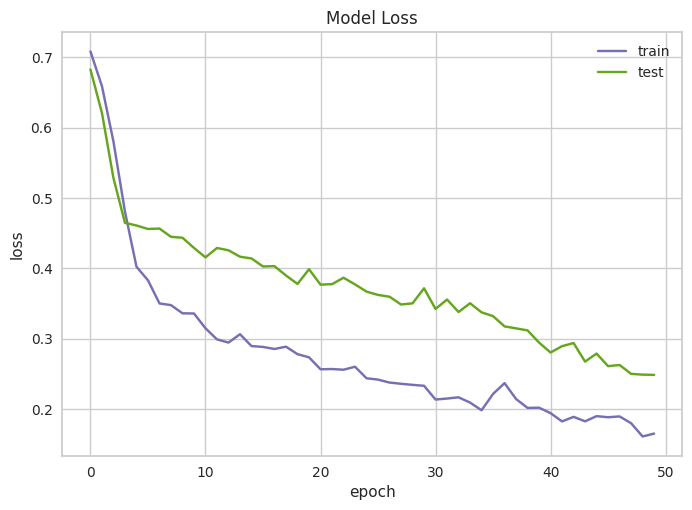

In [ ]:
# Initialize the scaler and normalize the training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)
model = Sequential()
model.add(Dense(64, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# compile model
adam = Adam(learning_rate=0.001)
# Change the loss to 'binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

# fit the model to the test data
history=model.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test),epochs=50, batch_size=64, callbacks=[es])
acc = model.evaluate(X_test_normalized, y_test)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

Penjelasan Cara Kerja dan Parameter algoritma pada Skenario 3

---

**Early Stopping Callback**

Cara Kerja:
- **EarlyStopping** digunakan untuk menghentikan pelatihan model lebih awal jika tidak ada perbaikan pada fungsi loss dalam jumlah epoch tertentu. Ini membantu mencegah overfitting.
- `patience=15`: Berarti pelatihan akan dihentikan jika tidak ada perbaikan pada loss dalam 15 epoch berturut-turut.
- `monitor='loss'`: Memantau nilai loss untuk menghentikan pelatihan.
- `mode='min'`: Menghentikan jika loss tidak lagi berkurang.

---

**Arsitektur Model:**
- **Layer Dense**: Setiap layer dihubungkan sepenuhnya dengan neuron-neuron pada layer sebelumnya.
- **Dropout**: Digunakan untuk mencegah overfitting dengan "mematikan" beberapa neuron selama pelatihan.
- **Regularisasi L2**: Menambahkan penalti terhadap bobot besar untuk mengurangi overfitting.
- **Input Layer**: Menggunakan 13 fitur input dengan 64 neuron.
- **Hidden Layers**: Terdapat tiga hidden layers dengan jumlah neuron yang berkurang (64 → 32 → 16 → 8). Setiap layer menggunakan fungsi aktivasi `ReLU` dan diikuti dengan layer `Dropout` untuk mencegah overfitting.
- **Output Layer**: Menggunakan fungsi aktivasi `sigmoid` untuk klasifikasi biner (output 0 atau 1).

---

**Compiler dan Optimizer**
- Model dikompilasi dengan menggunakan **Adam optimizer** yang adaptif, yang mengatur learning rate secara otomatis.
- **Loss Function**: Digunakan `binary_crossentropy` karena ini adalah masalah klasifikasi biner.
- **Metrics**: Menggunakan akurasi untuk memantau performa model selama pelatihan.

---

Metrik Pelatihan dan Validasi

| Metrik                 | Pelatihan    | Validasi    |
|------------------------|--------------|-------------|
| **Akurasi**            | 0.9613 (96.13%) | 0.9268 (92.68%) |
| **Loss**               | 0.1695       | 0.2487      |

- **Akurasi Pelatihan**: Model berhasil mencapai **akurasi 96,13%** pada data pelatihan, yang menunjukkan kemampuan model dalam mempelajari data pelatihan dengan baik.
- **Akurasi Validasi**: Pada data validasi, model memperoleh **akurasi 92,68%**, yang menunjukkan bahwa model dapat menggeneralisasi dengan baik pada data yang tidak terlihat.
- **Loss Pelatihan**: Loss pada data pelatihan adalah **16,95%**, yang menunjukkan bahwa model telah mempelajari pola dengan baik, tetapi ada sedikit kesalahan.
- **Loss Validasi**: Loss pada data validasi adalah **24,87%**, yang sedikit lebih tinggi dibandingkan pelatihan, menunjukkan bahwa model mungkin sedikit overfitting pada data pelatihan.

Metrik Pengujian

| Metrik               | Pengujian   |
|----------------------|-------------|
| **Akurasi**          | 0.9254 (92.54%) |
| **Loss**             | 0.2496      |

- **Akurasi Pengujian**: Model memperoleh **akurasi 92,54%** pada data uji, yang menunjukkan bahwa model memiliki kemampuan generalisasi yang baik pada data dunia nyata.
- **Loss Pengujian**: Loss pada data uji adalah **24,96%**, sedikit lebih tinggi dibandingkan dengan loss pelatihan dan validasi, yang mungkin menunjukkan sedikit overfitting.

Analisis Kinerja Model

| Aspek                       | Penjelasan                                                                                                                                 |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| **Tingkat Performa**        | Akurasi pelatihan yang tinggi (96,13%) menunjukkan bahwa model belajar dengan baik pada data pelatihan, namun ada penurunan akurasi pada validasi dan pengujian (92,68% dan 92,54%), yang menunjukkan adanya sedikit overfitting. |
| **Pelatihan vs Validasi**   | Perbedaan antara akurasi pelatihan dan validasi menunjukkan bahwa model dapat menggeneralisasi dengan baik, meskipun ada sedikit kesalahan pada data validasi dan uji. |
| **Loss**                     | Loss yang lebih tinggi pada validasi dan pengujian menunjukkan bahwa meskipun model memiliki akurasi yang baik, masih ada ruang untuk perbaikan dalam hal generalisasi dan mengurangi overfitting. |



### Scenario 4

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.7096 - loss: 1.0940 - val_accuracy: 0.8171 - val_loss: 1.0628
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8767 - loss: 0.8317 - val_accuracy: 0.8110 - val_loss: 1.0418
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8897 - loss: 0.7849 - val_accuracy: 0.8780 - val_loss: 1.0011
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.7652 - val_accuracy: 0.8659 - val_loss: 0.9675
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9090 - loss: 0.7228 - val_accuracy: 0.9085 - val_loss: 0.9292
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9144 - loss: 0.7210 - val_accuracy: 0.9146 - val_loss: 0.8917
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.6433 - val_accuracy: 0.9390 - val_loss: 0.8681
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9265 - loss: 0.6622 - val_accuracy: 0.8780 

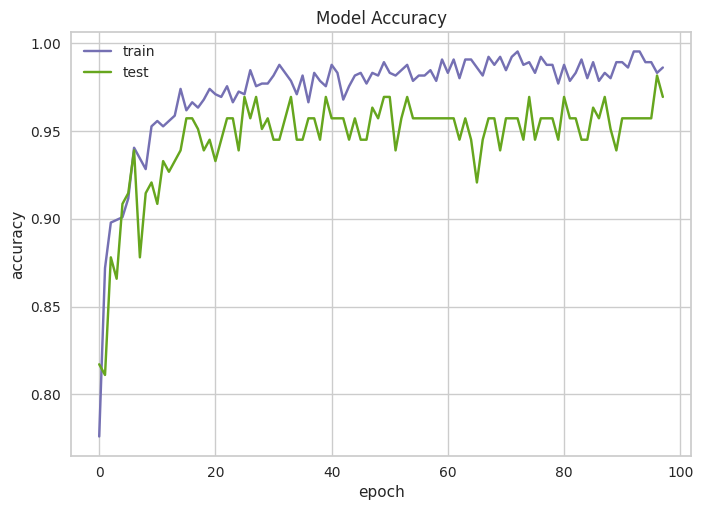

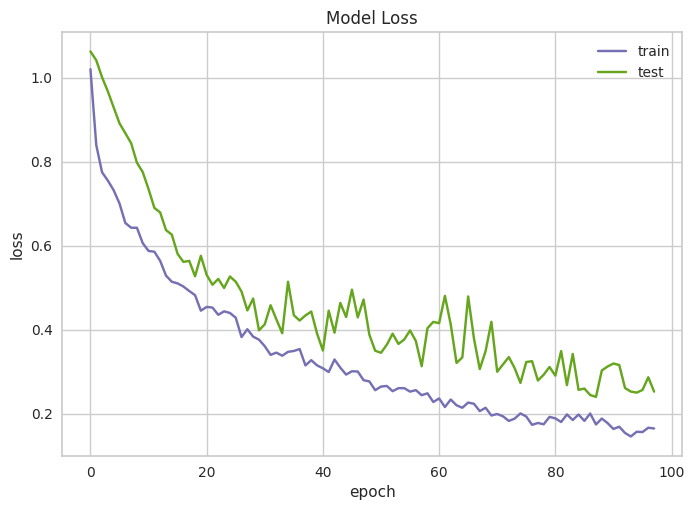

In [ ]:
#Improved Deep Learning Model
def create_deep_learning_model(input_shape):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),  # Add batch normalization
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        #layers.BatchNormalization(),
        #layers.Dropout(0.4),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and compile the model
model = create_deep_learning_model(input_shape=(X_train_scaled.shape[1],))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Deep Learning Model Accuracy: {accuracy * 100:.2f}%")

acc = model.evaluate(X_test_normalized, y_test)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()


Penjelasan Cara Kerja dan Parameter algoritma pada Skenario 4

---

**Early Stopping Callback**

Cara Kerja:
- **EarlyStopping** digunakan untuk menghentikan pelatihan model lebih awal jika tidak ada perbaikan pada fungsi loss selama sejumlah epoch tertentu.
- **Patience** mengontrol berapa banyak epoch yang akan dilalui sebelum menghentikan pelatihan jika tidak ada perbaikan.

- `monitor='loss'`: Memantau perubahan pada loss untuk menghentikan pelatihan.
- `mode='min'`: Menghentikan pelatihan jika nilai loss tidak berkurang.

---

**Arsitektur Model**

Penjelasan Layer:
- **Input Layer**: Menggunakan 13 fitur input dengan 64 neuron.
- **Hidden Layers**: Terdapat beberapa layer tersembunyi dengan jumlah neuron yang berkurang (64 → 32 → 16 → 8), masing-masing menggunakan fungsi aktivasi `ReLU` dan diikuti dengan layer `Dropout` untuk mencegah overfitting.
- **Output Layer**: Layer output dengan fungsi aktivasi `sigmoid` untuk menghasilkan output 0 atau 1 (klasifikasi biner).

---

**Compiler dan Optimizer**

Cara Kerja:
- **Adam Optimizer**: Digunakan untuk optimasi model dengan learning rate 0.001.
- **Loss Function**: Menggunakan `binary_crossentropy` karena ini adalah masalah klasifikasi biner.
- **Metrics**: Menggunakan akurasi untuk memantau performa model selama pelatihan.

---

**Pelatihan Model dengan Early Stopping**

Cara Kerja:
- Model dilatih dengan data pelatihan (`X_train_normalized`, `y_train`) dan data validasi (`X_test_normalized`, `y_test`).
- **Epochs**: Model dilatih selama 50 epoch, dengan ukuran batch 64.
- **Callback**: Menggunakan `EarlyStopping` untuk menghentikan pelatihan lebih awal jika tidak ada perbaikan pada loss.
---

### Auto tuning

In [ ]:
def create_and_train_model(X_train, y_train, X_test, y_test, optimizer='adam', learning_rate=0.001, num_layers=3, units_per_layer=64, dropout_rate=0.3, l2_reg=0.001, epochs=100, batch_size=32):

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = keras.Sequential()
    model.add(layers.Dense(units_per_layer, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Dropout(dropout_rate))

    for _ in range(num_layers - 1):
      model.add(layers.Dense(units_per_layer, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
      model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer_instance = Adam(learning_rate=learning_rate) if optimizer=='adam' else optimizer

    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    return model, history, accuracy, loss

# Hyperparameter tuning (example)
best_accuracy = 0
best_params = {}
for learning_rate in [0.001, 0.01]:
    for num_layers in [2, 3]:
        for units_per_layer in [32, 64]:
            for dropout_rate in [0.2, 0.3]:
                for l2_reg in [0.001, 0.01]:
                    model, history, accuracy, loss = create_and_train_model(X_train, y_train, X_test, y_test, learning_rate=learning_rate, num_layers=num_layers, units_per_layer=units_per_layer, dropout_rate=dropout_rate, l2_reg=l2_reg)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'learning_rate': learning_rate,
                            'num_layers': num_layers,
                            'units_per_layer': units_per_layer,
                            'dropout_rate': dropout_rate,
                            'l2_reg': l2_reg
                        }
                        print("New best accuracy:", accuracy, best_params)


print("Best accuracy:", best_accuracy)
print("Best parameters:", best_params)

New best accuracy: 0.8536585569381714 {'learning_rate': 0.001, 'num_layers': 2, 'units_per_layer': 32, 'dropout_rate': 0.2, 'l2_reg': 0.001}
New best accuracy: 0.9024389982223511 {'learning_rate': 0.001, 'num_layers': 2, 'units_per_layer': 64, 'dropout_rate': 0.2, 'l2_reg': 0.001}
New best accuracy: 0.9170731902122498 {'learning_rate': 0.001, 'num_layers': 3, 'units_per_layer': 32, 'dropout_rate': 0.2, 'l2_reg': 0.001}
New best accuracy: 0.9317073225975037 {'learning_rate': 0.01, 'num_layers': 3, 'units_per_layer': 32, 'dropout_rate': 0.2, 'l2_reg': 0.001}
New best accuracy: 0.9414634108543396 {'learning_rate': 0.01, 'num_layers': 3, 'units_per_layer': 64, 'dropout_rate': 0.3, 'l2_reg': 0.001}
Best accuracy: 0.9414634108543396
Best parameters: {'learning_rate': 0.01, 'num_layers': 3, 'units_per_layer': 64, 'dropout_rate': 0.3, 'l2_reg': 0.001}


# **Evaluation ⭐**

Evaluasi Proyek Machine Learning untuk memprediksi penyakit Jantung adalah sebagai berikut

1. Notebook ini telah memberikan Insight dari Analisis Data Eksploratori yang sangat Komprehensif baik dalam analisis Univariat maupun multivariat. Hal ini menjawab pertanyaan Problem Statement Business Pertama : **Insight apa saja yang dapat dipelajari dari dataset?**

2. Pada Problem Statement Kedua **Algoritme-Algoritme apa yang sesuai untuk memprediksi seseorang mengalami penyakit jantung?**, Berdasarkan hasil eksperimen yang menggunakan traditional machine learning dan deep learning, diperoleh bahwa :

    - **Stacking Classifier Base Models with Meta-Model**
    Model stacking ini sangat direkomendasikan karena mencapai akurasi uji tinggi sebesar 98.54%, dengan precision, recall, dan F1-score hampir sempurna untuk kedua kelas, menunjukkan kemampuan prediksi yang sangat baik. Dengan memanfaatkan kekuatan base models seperti Random Forest dan Extra Trees yang memiliki performa stabil, model stacking menggabungkan hasil terbaik dari masing-masing model untuk meningkatkan akurasi keseluruhan. Cross-validation menunjukkan rata-rata akurasi 96.10%, yang menegaskan konsistensi dan keandalannya di berbagai subset data. Pendekatan stacking sangat efektif dalam menangani data kompleks, menjadikannya pilihan unggul untuk masalah klasifikasi seperti prediksi penyakit jantung.

    - **Deep Learning Model Skenario 4**
    Model deep learning yang dibangun menunjukkan performa yang sangat baik dengan akurasi tinggi di atas **96%** pada data pelatihan (98,84%), validasi (96,95%), dan pengujian (95,23%).

kedua algoritme tersebut cocok dalam pengembangan dan analisis untuk prediksi penyakit jantung dan **Berhasil menjawab Problem Statement Kedua**    